In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Edit Text Content

In [2]:
with open("diabetes_scale.txt") as f:
    while True:
        text = f.readline()
        if not text:
            break
        text = text.rstrip()
        text = text.replace(" 1:",",")
        text = text.replace(" 2:",",")
        text = text.replace(" 3:",",")
        text = text.replace(" 4:",",")
        text = text.replace(" 5:",",")
        text = text.replace(" 6:",",")
        text = text.replace(" 7:",",")
        text = text.replace(" 8:",",")
        text = text+"\n"
        with open("data.csv","a") as f1:
            f1.write(text)
        
        

### Load the data

In [2]:
df = pd.read_csv("data.csv",header = None).dropna()
df

,0,1,2,3,4,5,6,7,8
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
...,...,...,...,...,...,...,...,...,...
763,1,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000
764,1,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000
765,1,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000
766,-1,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333


### Split the data into train set and test set

In [3]:
#label
y = np.array(df[0])
y_train = y[:599]
y_test = y[599:]
#feature
x = np.array(df.drop(0, axis = 1))
x_train = x[:599]
x_test = x[599:]

### Create the Perceptron class

In [4]:
class Perceptron1():
    
    def __init__(self, rate=0.01, n_iter=100):
        # rate: learn rate
        # n_iter: the number of iteration
        # weight: the weight of the features
        # b: the bias
        self.rate = rate
        self.n_iter = n_iter
        self.weight = None
        self.b = 0
    
    # train the model
    def fit(self, x, y):
        #Initialize Weights
        self.weight = np.zeros(x.shape[1])
        # update the w and b
        for i in range(self.n_iter):
            for xi, label in zip(x, y):
                update = self.rate * (label - self.predict(xi))
                self.weight += update * xi
                self.b += update
        return self
    
    # Calculate the actual value of net input
    def net_input(self, x):
        return np.dot(x, self.weight) + self.b
    
    # Return the predict value after step function
    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)
    
    # Calculate the accuracy of the model
    def acc(self, X, y):
        num = 0
        num1 = 0
        pre = self.predict(X)
        for i in pre:
            if pre[num] == y[num]:
                num1+=1
            num += 1
        return num1/num

In [5]:
p=Perceptron1()
p.fit(x_train,y_train)
p.predict(x_test)

array([ 1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,
       -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1,  1])

In [6]:
print("The weights of the model is:",p.weight)

The weights of the model is: [-0.00352613 -0.09255465  0.046562    0.01110371  0.01186388 -0.09416079
 -0.01274371 -0.02466792]


In [7]:
print("The accuracy of the model is:",p.acc(x_test,y_test))

The accuracy of the model is: 0.8125


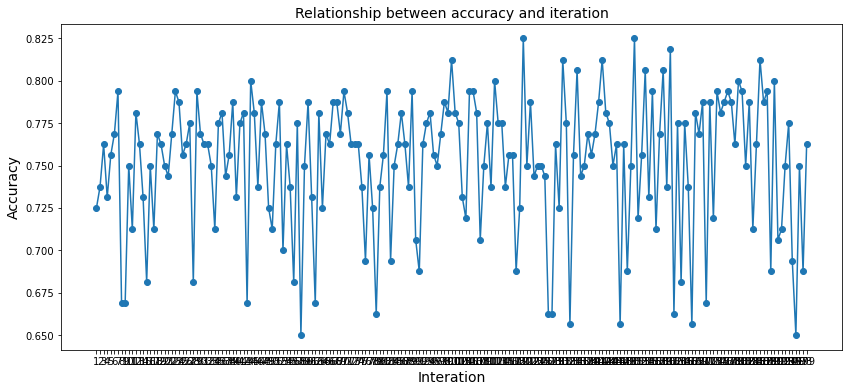

In [9]:
list1=[]
interation_num = range(1,200)
for i in interation_num:
    p1=Perceptron1(n_iter=i)
    p1.fit(x_train,y_train)
    list1.append(p1.acc(x_test,y_test))
    
plt.figure(figsize=(14, 6))
plt.plot(interation_num,list1,marker="o")
plt.xticks(interation_num)
plt.title('Relationship between accuracy and iteration', fontsize=14)
plt.xlabel('Interation', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()
    

### Use Perceptron from sklearn to verify

In [10]:
p_sklearn=Perceptron()
p_sklearn.fit(x_train,y_train)

Perceptron()

In [11]:
print("The weights of the model in sklearn is:",p_sklearn.coef_)

The weights of the model in sklearn is: [[-2.9999735  -3.10045345  0.344295    0.797934   -1.0733294  -5.95084372
  -0.7626171   0.9999342 ]]


In [12]:
print("The accuracy of the model in sklearn is:",p_sklearn.score(x_test,y_test))

The accuracy of the model in sklearn is: 0.75


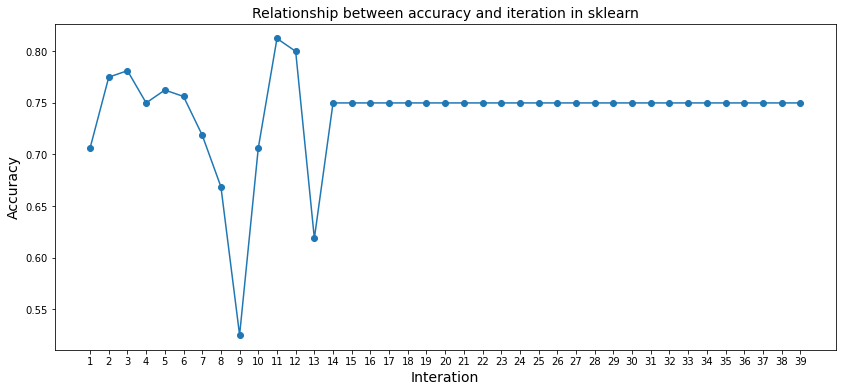

In [14]:
list2=[]
interation_num = range(1,40)
for i in interation_num:
    p2=Perceptron(max_iter=i)
    p2.fit(x_train,y_train)
    list2.append(p2.score(x_test,y_test))
    
plt.figure(figsize=(14, 6))
plt.plot(interation_num,list2,marker="o")
plt.xticks(interation_num)
plt.title('Relationship between accuracy and iteration in sklearn', fontsize=14)
plt.xlabel('Interation', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()